<a href="https://colab.research.google.com/github/Tejesh-25/Machine_Learning_Prediction/blob/Machine_Learning/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

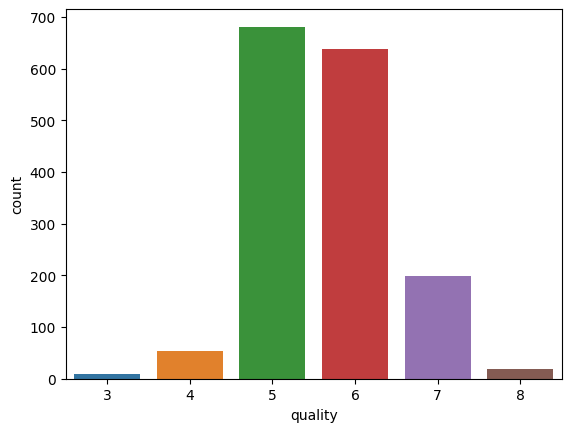

In [ ]:
sns.countplot(x=df['quality'])
plt.show()

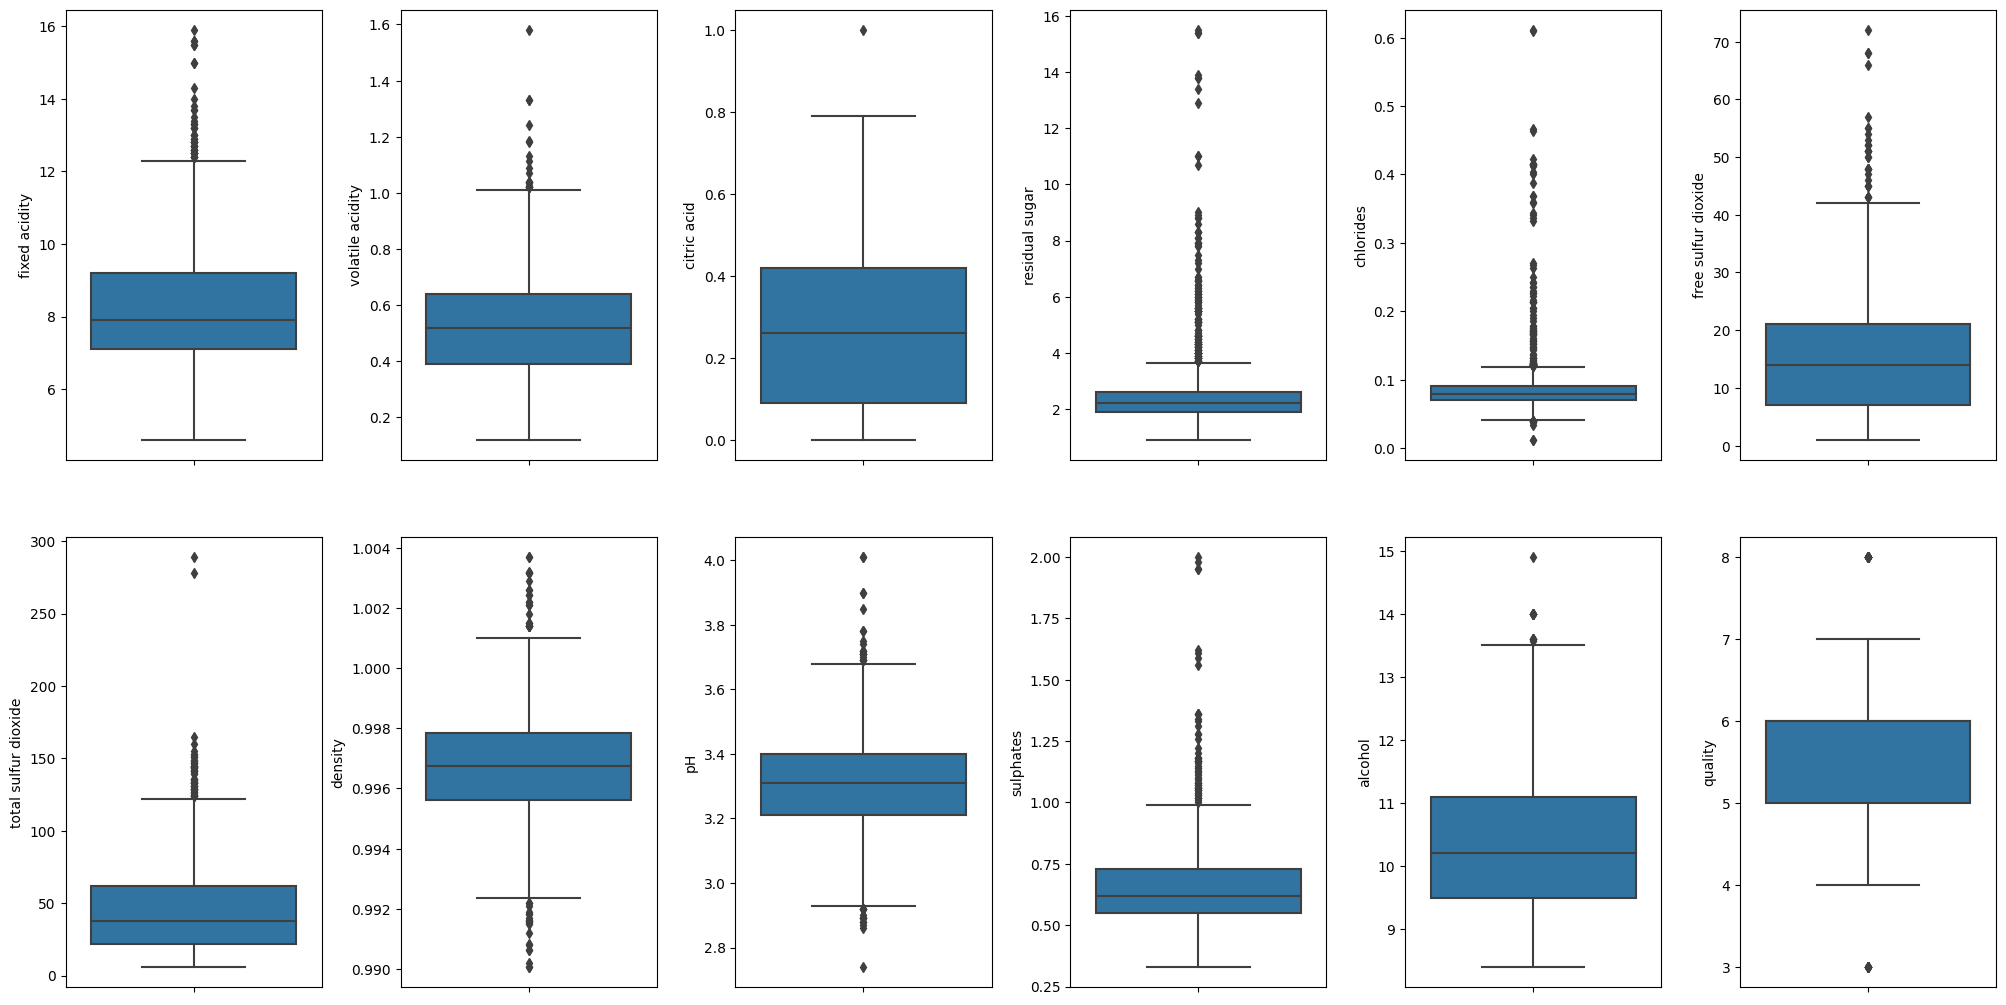

In [ ]:
fig,ax=plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in df.items():
  if col!="type":
    sns.boxplot(y=col,data=df,ax=ax[index])
    index=index+1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

With the help of the above box plot we can identified some of the plots have the continous value as as outlier. Some features have really far away from the dataset so, we are going to remove outliers for those features.

The feature are :



1. total sulfur dioxide
2. free sulfur dioxide
3.residual sugar
4.citric acid




In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Removing Outliers**


In [ ]:
#removing outlier from citric acid
q3=0.420000
q1=0.090000
iqr=(q3-q1)
uw= q3 + 1.5 * iqr
lw= q1 - 1.5 * iqr
print(uw,lw)

0.9149999999999999 -0.4049999999999999


In [ ]:
removing_index=df[df['citric acid']>uw].index

In [ ]:
df.drop(removing_index,inplace=True)

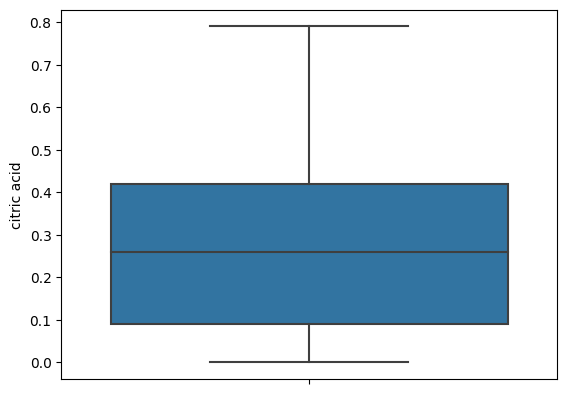

In [ ]:
sns.boxplot(y=df['citric acid'])
plt.show()

Now we can see clearly that we removed the outiler from the citric acid by seeing the above boxplot  

In [ ]:
#removing outlier from residual sugar
q3=2.600000
q1=1.900000
iqr=(q3-q1)
uw_rs= q3 + 1.5 * iqr
lw_rs= q1 - 1.5* iqr
print(uw_rs,lw_rs)

3.6500000000000004 0.8499999999999996


In [ ]:
index_removing_rs=df[df['residual sugar']>uw_rs].index

In [ ]:
df.drop(index_removing_rs,inplace=True)

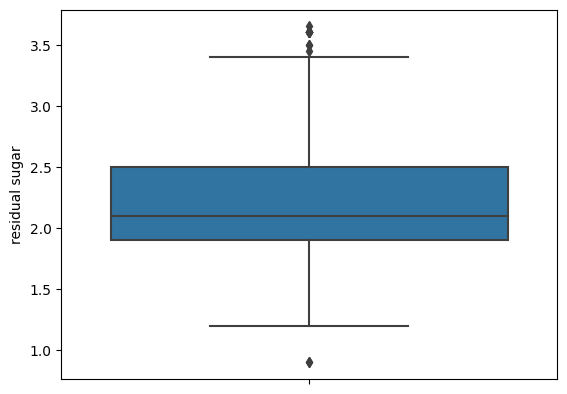

In [ ]:
sns.boxplot(y=df['residual sugar'])
plt.show()

In [ ]:
#removing outlier from free sulfur dioxide
q3_fsd=21.000000
q1_fsd=7.000000
iqr_fsd=(q3_fsd-q1_fsd)
uw_fsd= q3_fsd + 1.5 * iqr_fsd
lw_fsd= q1_fsd - 1.5* iqr_fsd
print(uw_fsd,lw_fsd)

42.0 -14.0


In [ ]:
remove_index_fsd=df[df['free sulfur dioxide']>uw_fsd].index

In [ ]:
df.drop(remove_index_fsd,inplace=True)

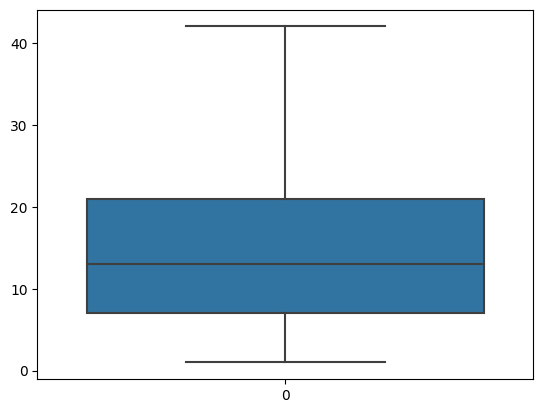

In [ ]:
sns.boxplot(df['free sulfur dioxide'])
plt.show()

In [ ]:
#removing outlier from total sulfur dioxide
q3_tsd=62.000000
q1_tsd=22.000000
iqr_tsd=(q3_tsd-q1_tsd)
uw_tsd= q3_tsd + 1.5 * iqr_tsd
lw_tsd= q1_tsd - 1.5 * iqr_tsd
print(uw_tsd,lw_tsd)

122.0 -38.0


In [ ]:
remove_index_tsd=df[df['total sulfur dioxide']>uw_tsd].index

In [ ]:
df.drop(remove_index_tsd,inplace=True)

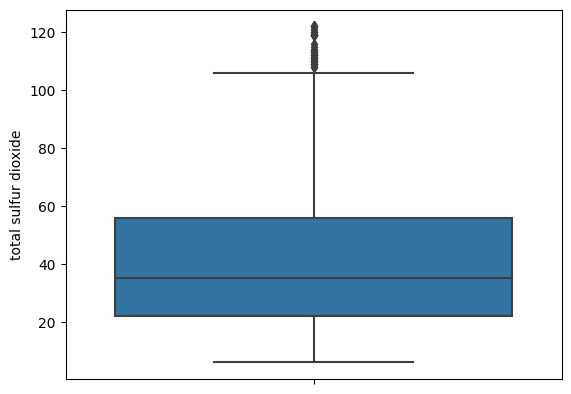

In [ ]:
sns.boxplot(y=df['total sulfur dioxide'])
plt.show()

After removing the outilers we are going to split the target variable as two categories 0 and 1. Quality less than equals to 6 will goes to 0 th category 0 is consider as bad wine quality and more than 6 will be consider as 1 st category and it mean Good quality of wine.

In [ ]:
df['wine quality']=[1 if x >=6 else 0 for x in df['quality'] ]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
df['wine quality'].value_counts()

1    764
0    625
Name: wine quality, dtype: int64

The data's are not unbalanced data so we can move futher to predict the wine quality with respective model

In [ ]:
X=df.drop(["quality","wine quality"],axis=1)
y=df['wine quality']

Now we need to split the data into two parts one is for train and another one is for test or eval so, we are going to with sklearn libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV

We are going to predict the Wine quality with the help of three classification models: Logistic Regression, Decision Tree, Random forest model.

Why are we using classification Model ?

Because the wine quality is the classification Model it either predicts 0 or 1
0 stands for bad quality of wine and 1 stands for good quality of wine.


**Logistic Regression**

In [ ]:
model=LogisticRegression(max_iter=1000)
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
model.fit(X_train,y_train)
log_pred=model.predict(X_eval)
print(log_pred)
log_accuracy=accuracy_score(y_eval,log_pred)
print(log_accuracy)
log_confusion=confusion_matrix(y_eval,log_pred)
print(log_confusion)

[1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0
 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1
 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0]
0.7302158273381295
[[ 87  38]
 [ 37 116]]


With the help of above metrics we can conclude that our model predicts 73 percentage of accuracy and we have false postive has 37 and false negative has 38

**Decision Tree on GridSearchCV**

In [ ]:
dt=dtc()
pram_grid={"criterion":["gini","entropy"],
           "max_depth":range(2,21),
           "min_samples_split":range(2,21)}
grid=GridSearchCV(dt,pram_grid,cv=5,scoring='accuracy',return_train_score=False,verbose=1)
grid_search=grid.fit(X,y)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits


In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [ ]:
grid_search.best_score_

0.7177882242942109

While doing decision tree classfier we need to know which One will do better so we are choosing with the help GridSearchcv method. After choosing the best_params we are going to implement in the decision tree.

Now we can implement with the help of best_params

In [ ]:
dt=dtc(criterion="entropy",max_depth=3,min_samples_split=2)
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_eval)
dt_accuracy=accuracy_score(y_eval,dt_pred)
print(dt_accuracy)
dt_confusion=confusion_matrix(y_eval,dt_pred)
print(dt_confusion)

0.697841726618705
[[98 27]
 [57 96]]


In [ ]:
import sklearn

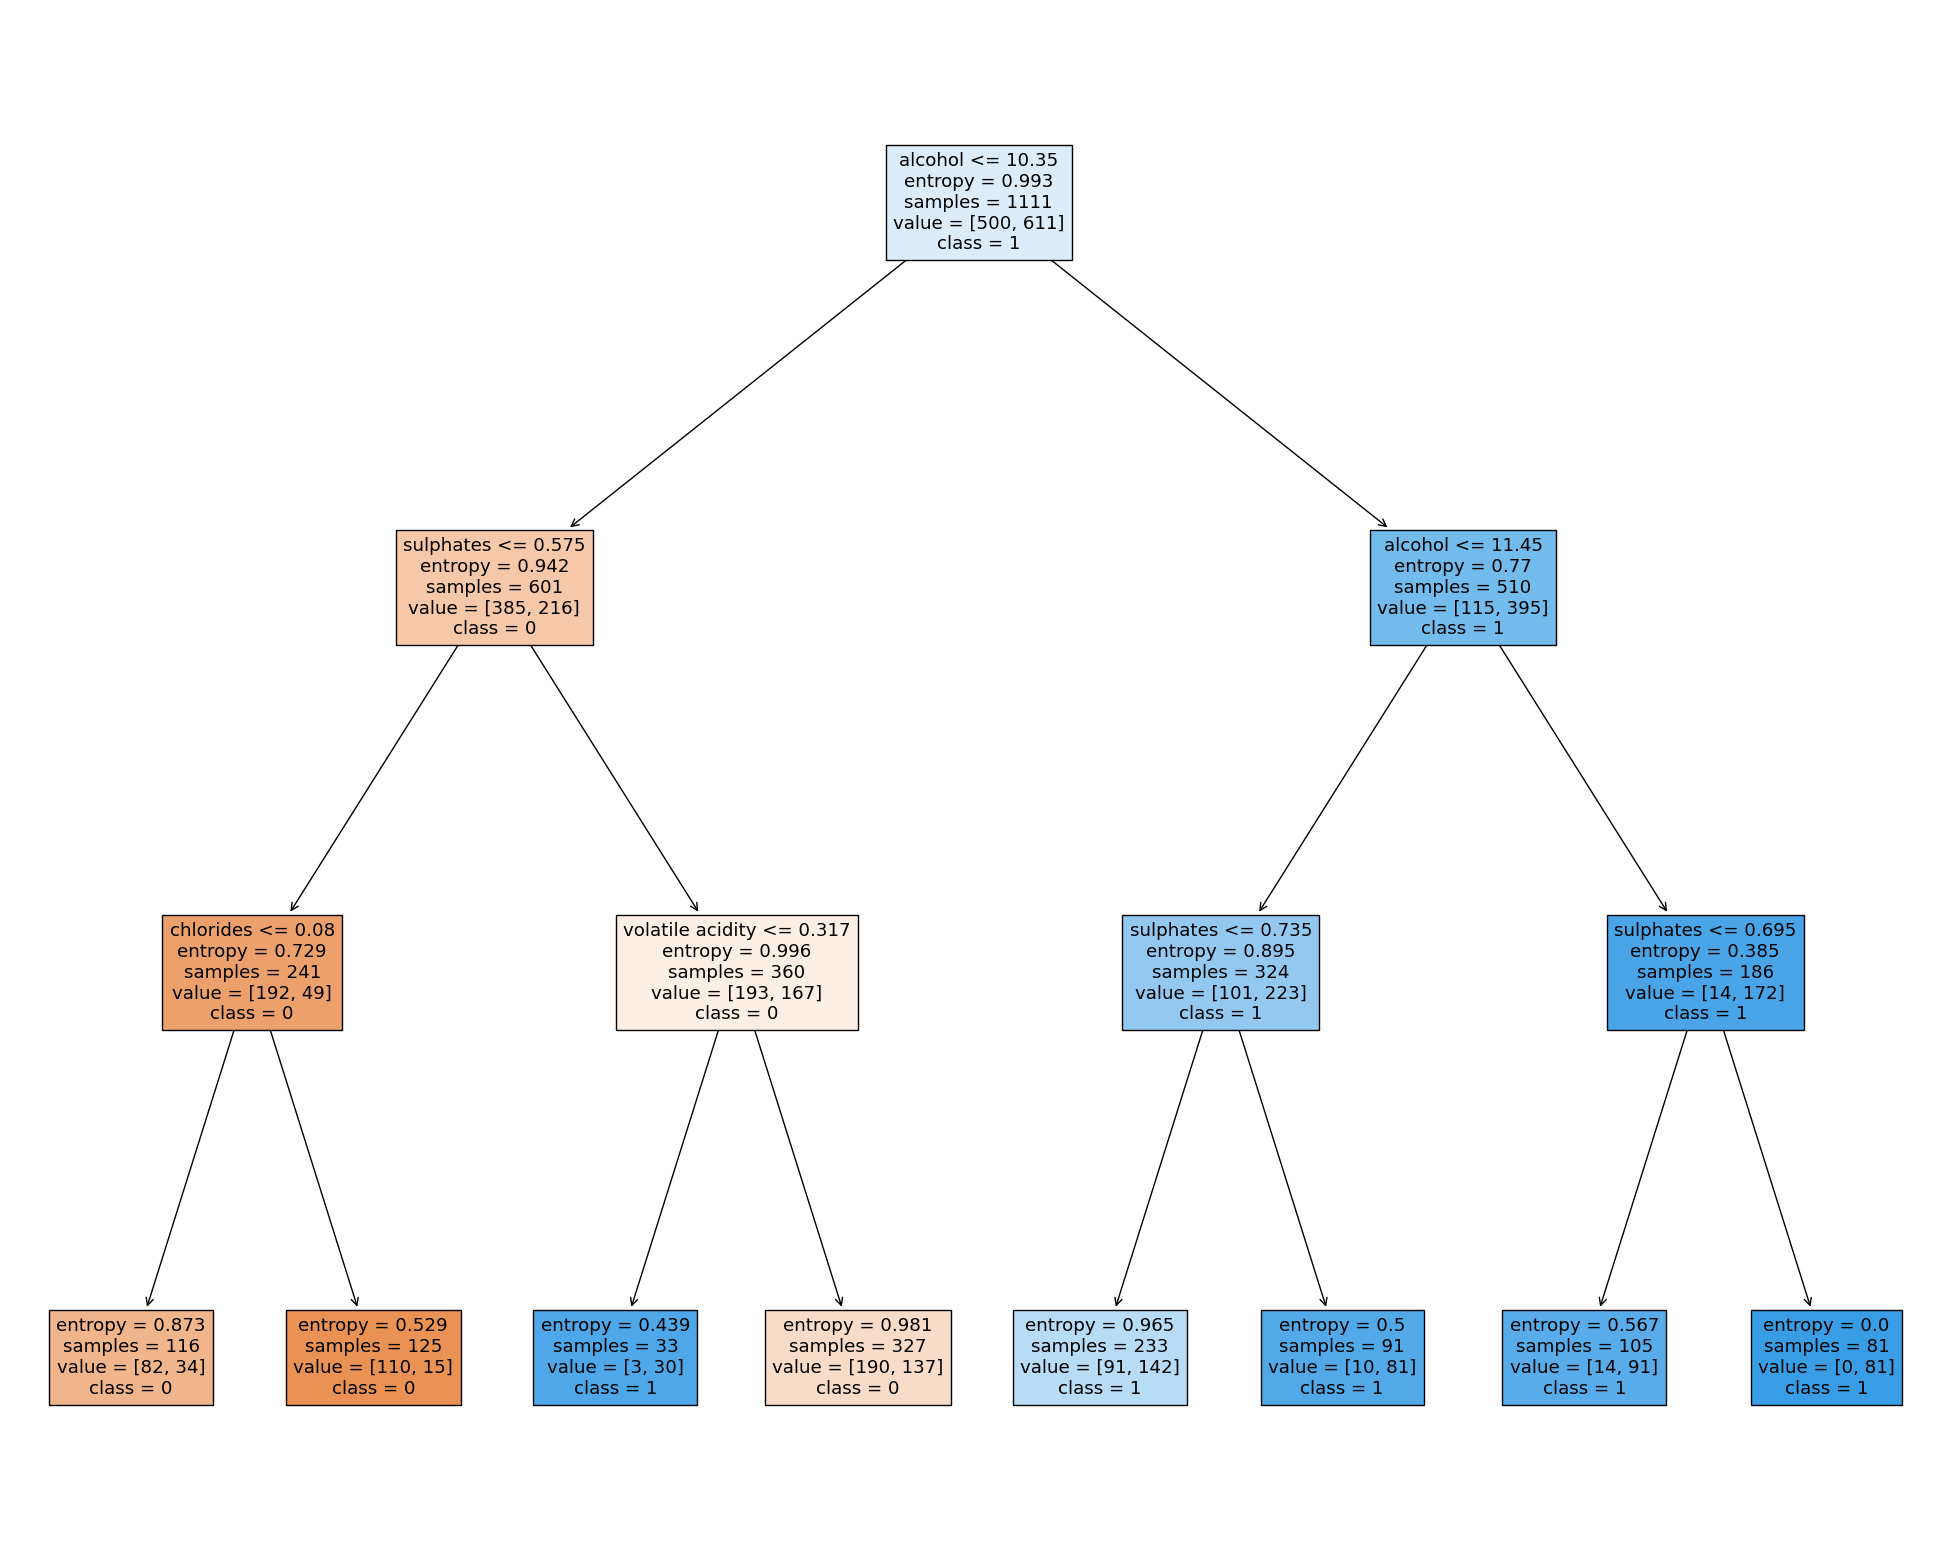

In [ ]:
feat=list(X_train.columns)
fig=plt.figure(figsize=(25,20))
_ =sklearn.tree.plot_tree(dt,
                           feature_names=feat,
                           class_names=['0','1'],
                           filled=True)

According to the Decission tree my model predicts only 69.78 percentage accuracy and False negative is 27 it is low compared to the logisticregression but false positive is 57 it is compartively high than the logistic regression

**Random Forest**

In [ ]:
rf=rfc()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_eval)
rf_accuracy=accuracy_score(y_eval,rf_pred)
print(rf_accuracy)
rf_confusion=confusion_matrix(y_eval,rf_pred)
print(rf_confusion)

0.8525179856115108
[[106  19]
 [ 22 131]]


Comparing to the three models Random Forest model have high accuracy_score and also it as less false negative and less false positive compare to Logistic Regression and Decision Tree classifier